In [ ]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
def open_pickle(filename):
  with open(filename, 'rb') as handle:
    results = pickle.load(handle)
    return results

In [22]:
bio_model_1 = open_pickle("/content/gdrive/MyDrive/Fall 22/Intro To DL Systems/Project Data/Final Data/BioQA/model_1.pickle")
bio_model_2 = open_pickle("/content/gdrive/MyDrive/Fall 22/Intro To DL Systems/Project Data/Final Data/BioQA/model_2.pickle")
bio_model_3 = open_pickle("/content/gdrive/MyDrive/Fall 22/Intro To DL Systems/Project Data/Final Data/BioQA/model_3.pickle")
bio_model_4 = open_pickle("/content/gdrive/MyDrive/Fall 22/Intro To DL Systems/Project Data/Final Data/BioQA/model_4.pickle")
bio_model_5 = open_pickle("/content/gdrive/MyDrive/Fall 22/Intro To DL Systems/Project Data/Final Data/BioQA/model_5.pickle")
bio_model_6 = open_pickle("/content/gdrive/MyDrive/Fall 22/Intro To DL Systems/Project Data/Final Data/BioQA/model_6.pickle")
bio_model_7 = open_pickle("/content/gdrive/MyDrive/Fall 22/Intro To DL Systems/Project Data/Final Data/BioQA/model_7.pickle")


gsm_model_1 = open_pickle("/content/gdrive/MyDrive/Fall 22/Intro To DL Systems/Project Data/Final Data/gsm/model_1.pickle")
gsm_model_2 = open_pickle("/content/gdrive/MyDrive/Fall 22/Intro To DL Systems/Project Data/Final Data/gsm/model_2.pickle")
gsm_model_3 = open_pickle("/content/gdrive/MyDrive/Fall 22/Intro To DL Systems/Project Data/Final Data/gsm/model_3.pickle")
gsm_model_4 = open_pickle("/content/gdrive/MyDrive/Fall 22/Intro To DL Systems/Project Data/Final Data/gsm/model_4.pickle")
gsm_model_5 = open_pickle("/content/gdrive/MyDrive/Fall 22/Intro To DL Systems/Project Data/Final Data/gsm/model_5.pickle")
gsm_model_6 = open_pickle("/content/gdrive/MyDrive/Fall 22/Intro To DL Systems/Project Data/Final Data/gsm/model_6.pickle")

In [ ]:
gsm_model_1["training_time"]/gsm_model_5["training_time"]

1.7832745805115833

In [ ]:
bio_model_1["training_time"]/bio_model_5["training_time"]

1.8929618575043456

In [ ]:
np.mean(bio_model_4["val_losses"][-35:])/np.mean(bio_model_1["val_losses"][-35:])

0.8560326877419532

In [ ]:
np.mean(gsm_model_5["val_losses"][-35:])/np.mean(gsm_model_1["val_losses"][-35:])

0.7238012223192926

**Difference in final losses**

In [31]:
model_numbers = [1, 2, 3, 4, 5]
bio_models = [bio_model_1, bio_model_2, bio_model_3, bio_model_4, bio_model_5]
gsm_models = [gsm_model_1, gsm_model_2, gsm_model_3, gsm_model_4, gsm_model_5]

def get_loss_list(models):
  loss_list = []
  for model in models:
    final_loss = model["val_losses"]
    loss_list.append(np.mean(final_loss[-35:]))
  return loss_list

In [32]:
bio_loss_list = get_loss_list(bio_models)
gsm_loss_list = get_loss_list(gsm_models)

<ipython-input-33-ed16b7ffccfc>:12: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(x, model_numbers)


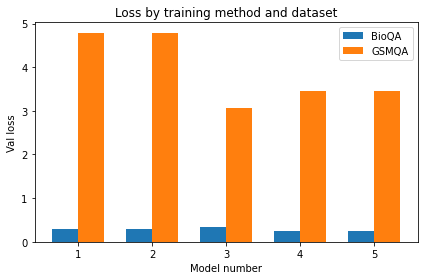

In [33]:
x = np.arange(1, len(model_numbers)+1)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, bio_loss_list, width, label='BioQA')
rects2 = ax.bar(x + width/2, gsm_loss_list, width, label='GSMQA')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Val loss')
ax.set_xlabel('Model number')
ax.set_title('Loss by training method and dataset')
ax.set_xticks(x, model_numbers)
ax.legend()


fig.tight_layout()

plt.savefig("val_loss.png")
plt.show()

**Difference in training times**

In [26]:
def get_time_list(models):
  time_list = []
  for model in models:
    time_list.append(model["training_time"])
  return time_list

In [27]:
bio_time_list = get_time_list(bio_models)
gsm_time_list = get_time_list(gsm_models)

<ipython-input-28-19b79417eca1>:12: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(x, model_numbers)


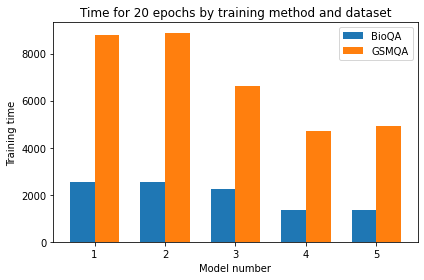

In [28]:
x = np.arange(1, len(model_numbers)+1)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, bio_time_list, width, label='BioQA')
rects2 = ax.bar(x + width/2, gsm_time_list, width, label='GSMQA')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Training time')
ax.set_xlabel('Model number')
ax.set_title('Time for 20 epochs by training method and dataset')
ax.set_xticks(x, model_numbers)
ax.legend()


fig.tight_layout()
plt.savefig("training_time.png")
plt.show()

**Difference in GPU utilization**

In [ ]:
bio_log_1 = pd.read_csv("/content/gdrive/MyDrive/Fall 22/Intro To DL Systems/Project Data/Final Data/BioQA/log_compute_model_1.csv")
bio_log_2 = pd.read_csv("/content/gdrive/MyDrive/Fall 22/Intro To DL Systems/Project Data/Final Data/BioQA/log_compute_model_2.csv")
bio_log_3 = pd.read_csv("/content/gdrive/MyDrive/Fall 22/Intro To DL Systems/Project Data/Final Data/BioQA/log_compute_model_3.csv")
bio_log_4 = pd.read_csv("/content/gdrive/MyDrive/Fall 22/Intro To DL Systems/Project Data/Final Data/BioQA/log_compute_model_4.csv")
bio_log_5 = pd.read_csv("/content/gdrive/MyDrive/Fall 22/Intro To DL Systems/Project Data/Final Data/BioQA/log_compute_model_5.csv")


gsm_log_1 = pd.read_csv("/content/gdrive/MyDrive/Fall 22/Intro To DL Systems/Project Data/Final Data/gsm/log_compute_model_1.csv")
gsm_log_2 = pd.read_csv("/content/gdrive/MyDrive/Fall 22/Intro To DL Systems/Project Data/Final Data/gsm/log_compute_model_2.csv")
gsm_log_3 = pd.read_csv("/content/gdrive/MyDrive/Fall 22/Intro To DL Systems/Project Data/Final Data/gsm/log_compute_model_3.csv")
gsm_log_4 = pd.read_csv("/content/gdrive/MyDrive/Fall 22/Intro To DL Systems/Project Data/Final Data/gsm/log_compute_model_4.csv")
gsm_log_5 = pd.read_csv("/content/gdrive/MyDrive/Fall 22/Intro To DL Systems/Project Data/Final Data/gsm/log_compute_model_5.csv")

In [ ]:
def convert_to_float(input_list): 
  res = []
  for i in range(len(input_list)):
    try:
      res.append(float(input_list[i]))
    except:
      pass
  return res


def get_avg_gpu_util(log):
  gpu_1 = list(log["0:GPU (%)"])
  gpu_2 = list(log["1:GPU (%)"])
  gpu_1 = convert_to_float(gpu_1)
  gpu_2 = convert_to_float(gpu_2)
  avg_gpu = (np.array(gpu_1)+np.array(gpu_2))/2.0
  return avg_gpu

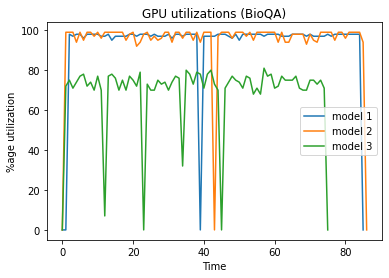

In [ ]:
plt.title("GPU utilizations (BioQA)")

plt.plot(bio_log_1["0:GPU (%)"], label="model 1")
plt.plot(bio_log_2["0:GPU (%)"], label="model 2")
plt.plot(bio_log_3["0:GPU (%)"], label="model 3")
plt.xlabel("Time")
plt.ylabel("%age utilization")

plt.legend()

plt.savefig("bio_gpu.png")
plt.show()

**Max GPU temperature**

In [ ]:
bio_logs = [bio_log_1, bio_log_2, bio_log_3, bio_log_4, bio_log_5]
gsm_logs = [gsm_log_1, gsm_log_2, gsm_log_3, gsm_log_4, gsm_log_5]

In [ ]:
def get_temps_list(logs):
  res = []
  for log in logs:
    if "1:Temp (C)" in log.columns:
      res.append(max(int(log["1:Temp (C)"].max()), int(log["0:Temp (C)"].max())))
    else:
      res.append(log["0:Temp (C)"].max())
  return res

In [ ]:
bio_temp_list = get_temps_list(bio_logs)
gsm_temp_list = get_temps_list(gsm_logs)

<ipython-input-55-baddac497801>:12: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(x, model_numbers)


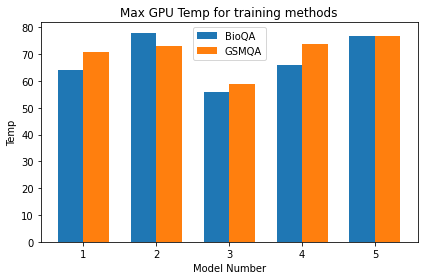

In [ ]:
x = np.arange(1, len(model_numbers)+1)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, bio_temp_list, width, label='BioQA')
rects2 = ax.bar(x + width/2, gsm_temp_list, width, label='GSMQA')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Temp')
ax.set_xlabel('Model Number')
ax.set_title('Max GPU Temp for training methods')
ax.set_xticks(x, model_numbers)
ax.legend()


fig.tight_layout()

plt.savefig("temp.png")
plt.show()

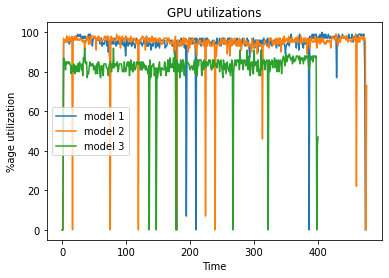

In [ ]:
plt.title("GPU utilizations")

plt.plot(gsm_log_1["0:GPU (%)"], label="model 1")
plt.plot(gsm_log_2["0:GPU (%)"], label="model 2")
plt.plot(gsm_log_3["0:GPU (%)"], label="model 3")

plt.xlabel("Time")
plt.ylabel("%age utilization")

plt.legend()

plt.savefig("gsm_gpu.png")
plt.show()

**Training the large model (800M params) on 3 GPUs using model parallelism**

In [29]:
bio_model_6 = open_pickle("/content/gdrive/MyDrive/Fall 22/Intro To DL Systems/Project Data/Final Data/BioQA/model_6.pickle")
gsm_model_6 = open_pickle("/content/gdrive/MyDrive/Fall 22/Intro To DL Systems/Project Data/Final Data/gsm/model_6.pickle")

In [34]:
bio_final_loss = bio_model_6["val_losses"]
gsm_final_loss = gsm_model_6["val_losses"]

In [35]:
bio_loss_list.append(np.mean(bio_final_loss[-35:]))
gsm_loss_list.append(np.mean(gsm_final_loss[-35:]))

In [36]:
model_numbers.append(6)

<ipython-input-38-55cf0289e582>:12: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(x, model_numbers)


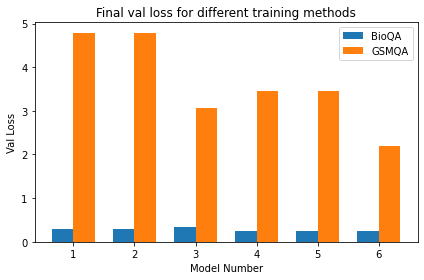

In [38]:
x = np.arange(1, len(model_numbers)+1)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, bio_loss_list, width, label='BioQA')
rects2 = ax.bar(x + width/2, gsm_loss_list, width, label='GSMQA')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Val Loss')
ax.set_xlabel('Model Number')
ax.set_title('Final val loss for different training methods')
ax.set_xticks(x, model_numbers)
ax.legend()


fig.tight_layout()

plt.savefig("big_model_loss.png")
plt.show()

In [39]:
bio_time_list.append(bio_model_6["training_time"])
gsm_time_list.append(gsm_model_6["training_time"])

<ipython-input-40-fef2d9d9cf71>:12: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(x, model_numbers)


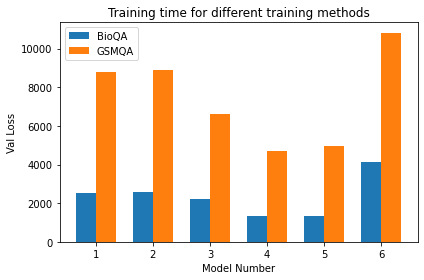

In [40]:
x = np.arange(1, len(model_numbers)+1)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, bio_time_list, width, label='BioQA')
rects2 = ax.bar(x + width/2, gsm_time_list, width, label='GSMQA')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Val Loss')
ax.set_xlabel('Model Number')
ax.set_title('Training time for different training methods')
ax.set_xticks(x, model_numbers)
ax.legend()


fig.tight_layout()

plt.savefig("big_model_time.png")
plt.show()

**Observing training speed-up with GPUs for BioQA**

In [ ]:
n_gpus = [1, 2, 4]

times = []
times.append(bio_model_1["training_time"])
times.append(bio_model_5["training_time"])
times.append(bio_model_7["training_time"])

In [ ]:
times

[2522.3642983436584, 1332.4961030483246, 691.4854533672333]

In [ ]:
perfect_scale_times = [2522.3642983436584, 2522.3642983436584/2, 2522.3642983436584/4]

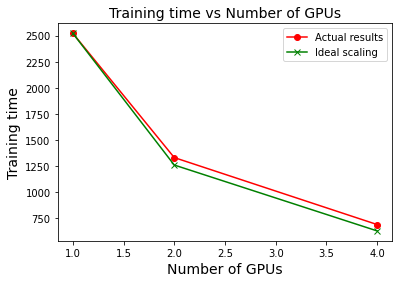

In [ ]:
plt.plot(n_gpus, times, color='red', marker='o', label="Actual results")
plt.plot(n_gpus, perfect_scale_times, color='green', marker='x', label="Ideal scaling")
plt.title('Training time vs Number of GPUs', fontsize=14)
plt.xlabel('Number of GPUs', fontsize=14)
plt.ylabel('Training time', fontsize=14)
plt.legend()
plt.show()

**Pareto Curve**

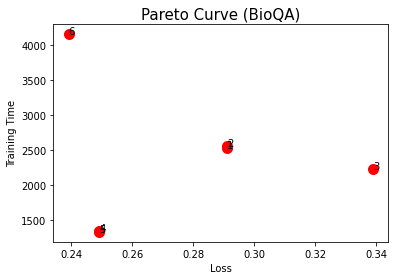

In [41]:
annotations=["1","2","3","4","5", "6"]

plt.figure(figsize=(6,4))
plt.scatter(bio_loss_list, bio_time_list,s=100,color="red")
plt.xlabel("Loss")
plt.ylabel("Training Time")
plt.title("Pareto Curve (BioQA)",fontsize=15)
for i, label in enumerate(annotations):
    plt.annotate(label, (bio_loss_list[i], bio_time_list[i]))

plt.savefig("pareto_bio.png")
plt.show()

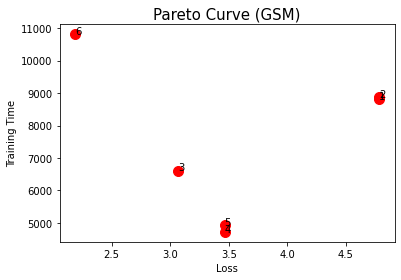

In [42]:
annotations=["1","2","3","4","5","6"]

plt.figure(figsize=(6,4))
plt.scatter(gsm_loss_list, gsm_time_list,s=100,color="red")
plt.xlabel("Loss")
plt.ylabel("Training Time")
plt.title("Pareto Curve (GSM)",fontsize=15)
for i, label in enumerate(annotations):
    plt.annotate(label, (gsm_loss_list[i], gsm_time_list[i]))

plt.savefig("pareto_gsm.png")
plt.show()